## Bringing the Dataset in the Memory

In [1]:
!git clone https://github.com/mrikum7/DeepLearningITV601.git

Cloning into 'DeepLearningITV601'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 103486 (delta 12), reused 35 (delta 6), pack-reused 103445
Receiving objects: 100% (103486/103486), 1.36 GiB | 45.41 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (103394/103394), done.


In [2]:
cd DeepLearningITV601/Datasets/CatvsDog/train

/content/DeepLearningITV601/Datasets/CatvsDog/train


In [3]:
ls 

cats/  dogs/  test/  train/


# Importing Modules

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing import image

In [5]:
import matplotlib.pyplot as plt
from keras import models
import plotly.graph_objs as go

In [ ]:
#img = image.load_img('train_cats/cat.5469.jpg', color_mode = 'rgb', target_size = (200, 200))

In [ ]:
#data = np.asarray(img)/255

In [6]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)))  # (198, 198, 32)
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))                               # (196, 196, 32)      
model.add(keras.layers.MaxPooling2D((2, 2)))                                                  # (98, 98, 32)
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))                               # (96, 96, 64)
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))                               # (94, 94, 64)
model.add(keras.layers.MaxPooling2D((2, 2)))                                                  # (47, 47, 64)
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))                              # (45, 45, 128)
model.add(keras.layers.MaxPooling2D((2, 2)))                                                  # (22, 22, 128)
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))                              # (20, 20, 128)
model.add(keras.layers.MaxPooling2D((2, 2)))                                                  # (10, 10, 128)
model.add(keras.layers.Conv2D(256, (3, 3), activation = 'relu'))                              # (8, 8, 256)
model.add(keras.layers.MaxPooling2D((2, 2)))                                                  # (4, 4, 256)
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)       7

In [ ]:
#ls ..

cats/  dogs/  test/  train/


In [8]:
traingen = image.ImageDataGenerator(rescale = 1./255)
train = image.DirectoryIterator('train', image_data_generator = traingen,
                                target_size = (200, 200), class_mode = 'binary',
                                batch_size = 40)
testgen = image.ImageDataGenerator(rescale = 1./255)
test = image.DirectoryIterator('test', image_data_generator = testgen,
                                target_size = (200, 200), class_mode = 'binary',
                                batch_size = 40)

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [9]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train, steps_per_epoch = 50, epochs = 30)

Epoch 1/30
50/50 [==============================] - 42s 141ms/step - loss: 0.6946 - accuracy: 0.5003
Epoch 2/30
50/50 [==============================] - 7s 139ms/step - loss: 0.6916 - accuracy: 0.5237
Epoch 3/30
50/50 [==============================] - 7s 139ms/step - loss: 0.6837 - accuracy: 0.5445
Epoch 4/30
50/50 [==============================] - 7s 141ms/step - loss: 0.6678 - accuracy: 0.5966
Epoch 5/30
50/50 [==============================] - 7s 140ms/step - loss: 0.6559 - accuracy: 0.6036
Epoch 6/30
50/50 [==============================] - 7s 140ms/step - loss: 0.6305 - accuracy: 0.6307
Epoch 7/30
50/50 [==============================] - 7s 143ms/step - loss: 0.6079 - accuracy: 0.6565
Epoch 8/30
50/50 [==============================] - 7s 140ms/step - loss: 0.6023 - accuracy: 0.6765
Epoch 9/30
50/50 [==============================] - 7s 141ms/step - loss: 0.5768 - accuracy: 0.6972
Epoch 10/30
50/50 [==============================] - 7s 140ms/step - loss: 0.5834 - accuracy: 0.692

In [11]:
history = model.history

In [12]:
fig = go.Figure()
fig.add_scatter(x = history.epoch,
                y = history.history['accuracy'],
                name = 'Accuracy', mode = 'markers+lines')
fig.add_scatter(x = history.epoch, y = history.history['loss'],
                name = 'Loss',
                mode = 'markers+lines')
fig.show()
'''fig.add_scatter(x = history.epoch,
                y = history.history['val_accuracy'],
                name = 'Validation Accuracy', mode = 'markers+lines')
fig.add_scatter(x = history.epoch, y = history.history['val_loss'],
                name = 'Testing Loss',
                mode = 'markers+lines')'''

"fig.add_scatter(x = history.epoch,\n                y = history.history['val_accuracy'],\n                name = 'Validation Accuracy', mode = 'markers+lines')\nfig.add_scatter(x = history.epoch, y = history.history['val_loss'],\n                name = 'Testing Loss',\n                mode = 'markers+lines')"

In [ ]:
testgen = image.ImageDataGenerator(1./255)
test = image.DirectoryIterator('../test', image_data_generator = testgen,
                                target_size = (200, 200), class_mode = 'binary',
                                batch_size = 40)

Found 800 images belonging to 2 classes.


In [ ]:
model.evaluate(test)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



20/20 [==============================] - 3s 120ms/step - loss: 1.1623 - accuracy: 0.6988


[1.162348747253418, 0.6987500190734863]

In [ ]:
model.history.history

{}

In [ ]:
ls

cats/  dogs/  test/  train/


In [13]:
img = image.load_img('cats/cat.1700.jpg', target_size = (200, 200))
data = np.asarray(img)/255

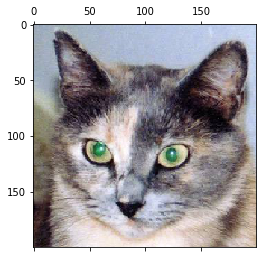

In [14]:
plt.matshow(data, cmap = 'viridis')

In [15]:
output = [layer.output for layer in model.layers[:8]]

In [16]:
activation = models.Model(inputs = model.input, outputs = output)

In [17]:
activations = activation.predict(data.reshape((1, 200, 200, 3)))

In [22]:
activations[3].shape

(1, 96, 96, 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

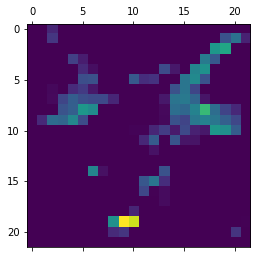

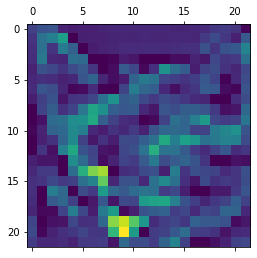

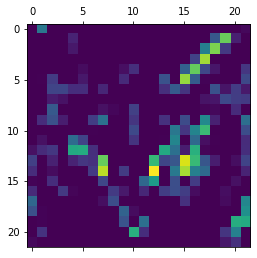

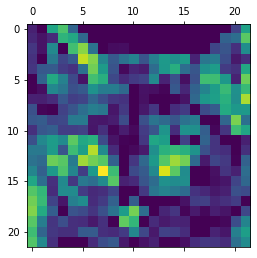

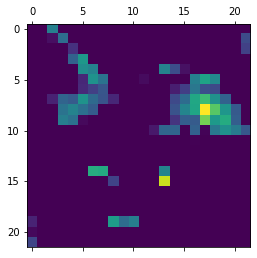

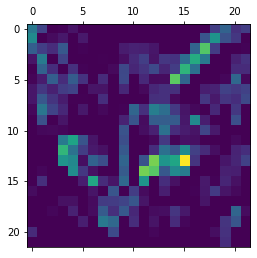

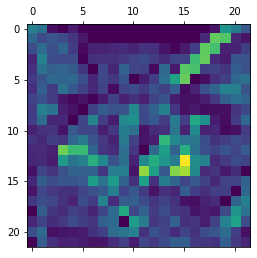

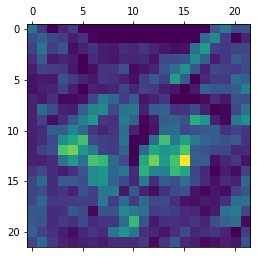

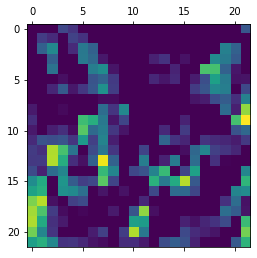

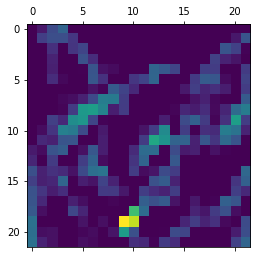

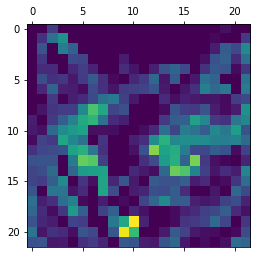

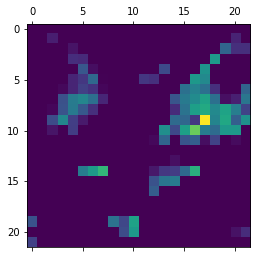

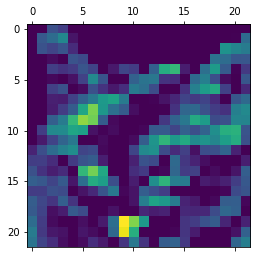

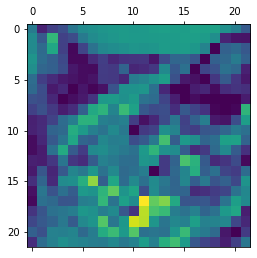

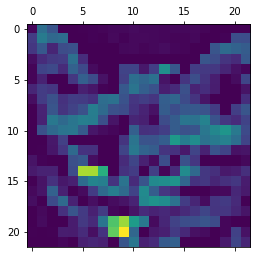

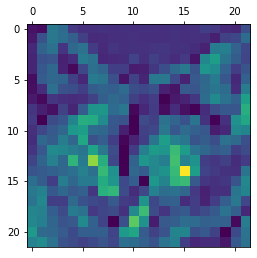

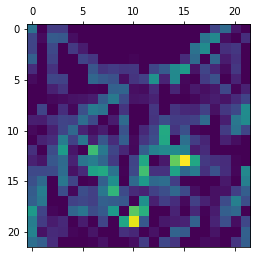

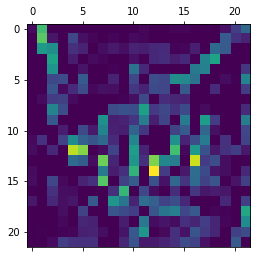

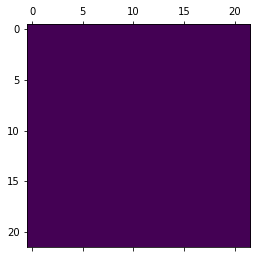

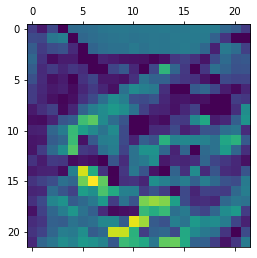

In [26]:
for i in range(20):
  plt.figure(i)
  plt.matshow(activations[7][0, :, :, i])